In [15]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
%matplotlib inline
import yfinance as yf
import datetime
import matplotlib.pyplot as plt


start_sp = datetime.datetime(2021, 10, 22)
end_sp = datetime.datetime(2022, 12, 31)


aapl = yf.download('AAPL',start_sp,end_sp)

[*********************100%***********************]  1 of 1 completed


In [3]:
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-22,149.690002,150.179993,148.639999,148.690002,147.391541,58883400
2021-10-25,148.679993,149.369995,147.619995,148.639999,147.341965,50720600
2021-10-26,149.330002,150.839996,149.009995,149.320007,148.016037,60893400
2021-10-27,149.360001,149.729996,148.490005,148.850006,147.550140,56094900
2021-10-28,149.820007,153.169998,149.720001,152.570007,151.237656,100077900
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400


# Time series 

In [4]:
#1. plot price time series

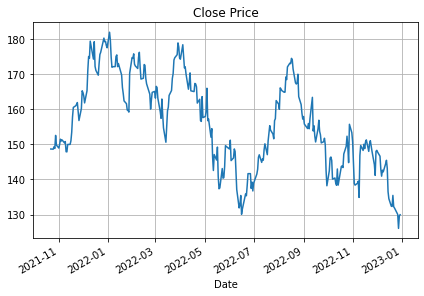

In [5]:
aapl['Close'].plot()
plt.tight_layout()
plt.title('Close Price')
plt.grid()
plt.show()

# Moving averages

In [6]:
#3. Define mathematically the moving average of the price time series with an arbitrary timewindow τ

Moving average keeps updating the average data and find the average change through time. It is a dynamically updated weights. There are several kinds of moving average, such as simple moving average and exponential moving average.

For SMA:  $s_{t-1} = 1/T \sum_{1}^{T} r_{t-k}$

For EWMA: $s_{t-1} = c(\lambda)\sum_{k=1}^{∞} \lambda^k r_{t-k}$

The longer the time, larger the lags. If the plot of the moving average shows an upward trend, then it indicates the data will very likely to move up later. In contrast, a downward trend will show that the data will move down with high possibility.

In [7]:
#4. Compute three moving averages of the price time series, with time-windows τ = 10,20,30

In [8]:
def ma_f(data,window_size):
    i = 0
    ma_list = []
    while i < len(data)-window_size+1:    
        window = data[i:i+window_size]
        window_average = sum(window)/window_size
        ma_list.append(window_average)
        i =i+1
    return ma_list
#print(moving_averages)

In [9]:
w10=ma_f(aapl['Close'],10)
#print(len(ma_f(aapl['Close'],10)))
w20=ma_f(aapl['Close'],20)
w30=ma_f(aapl['Close'],30)

In [10]:
aapl['ma_10']=aapl['Close'].rolling(window=10).mean()
aapl['ma_20']=aapl['Close'].rolling(window=20).mean()
aapl['ma_30']=aapl['Close'].rolling(window=30).mean()
aapl

,Open,High,Low,Close,Adj Close,Volume,ma_10,ma_20,ma_30
Date,,,,,,,,,
2021-10-22,149.690002,150.179993,148.639999,148.690002,147.391541,58883400,NaN,NaN,NaN
2021-10-25,148.679993,149.369995,147.619995,148.639999,147.341965,50720600,NaN,NaN,NaN
2021-10-26,149.330002,150.839996,149.009995,149.320007,148.016037,60893400,NaN,NaN,NaN
2021-10-27,149.360001,149.729996,148.490005,148.850006,147.550140,56094900,NaN,NaN,NaN
2021-10-28,149.820007,153.169998,149.720001,152.570007,151.237656,100077900,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900,136.839000,140.6610,143.646999
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800,135.392999,139.9515,142.991332
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400,133.449999,139.1950,142.249999


In [11]:
#5. Plot the moving averages against the price time series

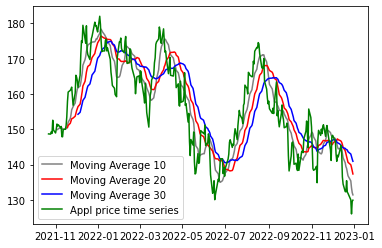

In [12]:
plt.plot(aapl.ma_10,color='grey',label = "Moving Average 10")
plt.plot(aapl.ma_20,color='red',label = "Moving Average 20")
plt.plot(aapl.ma_30,color='blue',label = "Moving Average 30")
plt.plot(aapl['Close'],color='green',label = "Appl price time series")
plt.legend()

In [13]:
#6. Compute the linear and log-return of the price time series

In [16]:
log_rets= (np.log(aapl.Close) - np.log(aapl.Close.shift(1))).dropna()
print(log_rets)
linear_rets = ((aapl.Close) /aapl.Close.shift(1) -1).dropna()
print(linear_rets)

Date
2021-10-25   -0.000336
2021-10-26    0.004564
2021-10-27   -0.003153
2021-10-28    0.024684
2021-10-29   -0.018322
                ...   
2022-12-23   -0.002802
2022-12-27   -0.013976
2022-12-28   -0.031166
2022-12-29    0.027931
2022-12-30    0.002466
Name: Close, Length: 299, dtype: float64
Date
2021-10-25   -0.000336
2021-10-26    0.004575
2021-10-27   -0.003148
2021-10-28    0.024992
2021-10-29   -0.018156
                ...   
2022-12-23   -0.002798
2022-12-27   -0.013878
2022-12-28   -0.030685
2022-12-29    0.028324
2022-12-30    0.002469
Name: Close, Length: 299, dtype: float64


In [17]:
#7. Plot the linear return against the log-return time series

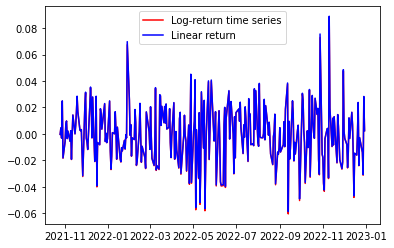

In [18]:
plt.plot(log_rets,color='red',label = "Log-return time series")
plt.plot(linear_rets,color='blue',label = "Linear return")
plt.legend()

# Time Series Analysis

In [19]:
import pandas
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from pandas_datareader import data as pdr

import statsmodels
import statsmodels.api as sm

In [20]:
#8. Define the auto-correlation function (for a stationary time-series)

The mathematical formuala for autocorrelation function $\rho_k =\frac{Cov(e_t+e_{t+k })}{\sigma^2}$, where the time series is stationary. This means that it doesn't depend on time. In time series, we calculate different time steps (lags) to find the correlations between the data points themselves. It is a way to find the correlation with itself.


In [21]:
#9. Compute the auto-correlation function (ACF) of the price time series

In [22]:
close_aapl = aapl['Close']
acf_aapl = statsmodels.tsa.stattools.acf(close_aapl)

In [23]:
acf_aapl

array([1.        , 0.96078203, 0.92231115, 0.88743308, 0.85563346,
       0.82588951, 0.7901401 , 0.75713222, 0.72314405, 0.69478986,
       0.66498907, 0.64208303, 0.61657133, 0.59364492, 0.56789896,
       0.53966434, 0.51482728, 0.49031151, 0.46810689, 0.44314312,
       0.41798741, 0.39456291, 0.3707772 , 0.3462498 , 0.32195697])

In [24]:
#10. Plot the price ACF

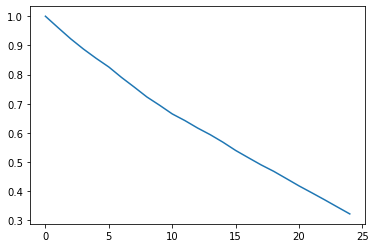

In [25]:
plt.plot(acf_aapl)

In [26]:
#11. Compute the partial auto-correlation function (PACF) of the price time series

In [27]:
pacf_aapl = statsmodels.tsa.stattools.pacf(close_aapl)

In [28]:
pacf_aapl

array([ 1.00000000e+00,  9.63995347e-01, -1.11135531e-02,  2.95916168e-02,
        2.47577040e-02,  1.38258854e-02, -1.00221087e-01,  2.13166087e-02,
       -4.02401459e-02,  5.89634750e-02, -4.36439158e-02,  9.91470506e-02,
       -6.10178198e-02,  4.26563239e-02, -7.67253277e-02, -3.26090668e-02,
       -5.69832273e-04,  8.43204206e-03, -6.18226250e-03, -2.57154310e-02,
       -3.03552951e-02,  2.10796638e-02, -4.54695742e-02, -2.45173451e-02,
       -2.04634680e-02])

In [29]:
#12. Plot the price PACF

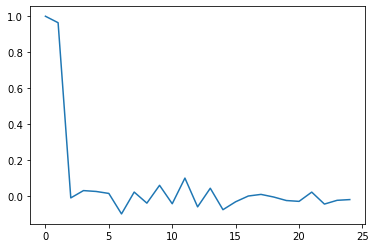

In [30]:
plt.plot(pacf_aapl)

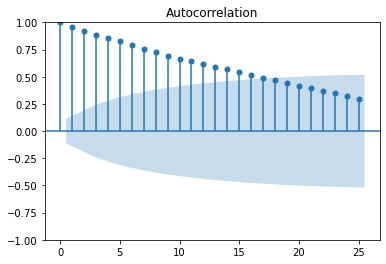

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(close_aapl)

plt.show()

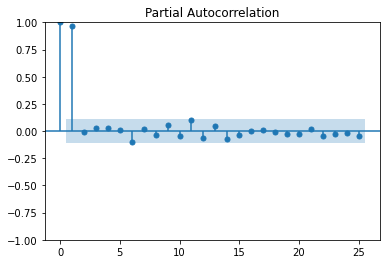

In [32]:
plot_pacf(close_aapl) 

plt.show()

In [33]:
#13. Compute the auto-correlation function (ACF) of the return time series & plot

In [34]:
r_aapl = close_aapl[1:]/close_aapl[:-1].values - 1

[ 1.         -0.01801462 -0.08718221 -0.01960651 -0.0191057   0.08848507
 -0.01422222 -0.02018797 -0.07695337  0.05369808 -0.10196786  0.0752438
 -0.02383973  0.03506303  0.01380465 -0.03494535 -0.01084757 -0.01309853
  0.07785791  0.02084465 -0.00345969 -0.00330845 -0.03916822  0.02004293
  0.02073833]


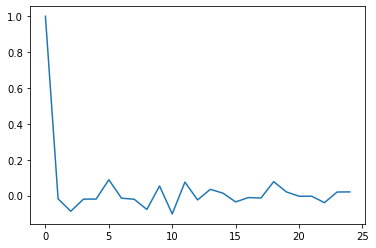

In [35]:
r_acf_aapl = statsmodels.tsa.stattools.acf(r_aapl)
print(r_acf_aapl)
plt.plot(r_acf_aapl)
plt.show()

In [36]:
#15. Compute the partial auto-correlation function (PACF) of the return time series & plot

[ 1.         -0.01807507 -0.0881248  -0.02331293 -0.0282349   0.08595187
 -0.0157805  -0.00664013 -0.08100703  0.05481646 -0.13009086  0.08944481
 -0.05032564  0.07293535 -0.01544449  0.00375587 -0.0447588   0.00660461
  0.04432635  0.05365126 -0.0195119   0.04472588 -0.06912515  0.03525725
 -0.00941825]


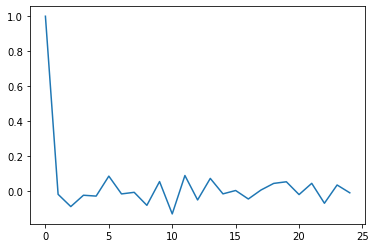

In [37]:
r_pacf_aapl = statsmodels.tsa.stattools.pacf(r_aapl)
print(r_pacf_aapl)
plt.plot(r_pacf_aapl)
plt.show()

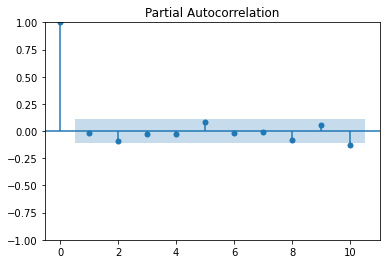

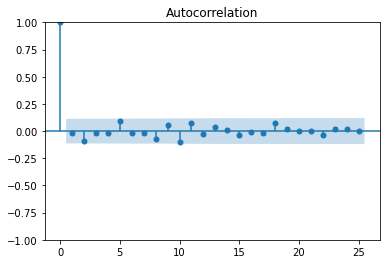

In [38]:
plot_pacf(r_aapl,lags=10) 
plot_acf(r_aapl) 
plt.show()

# ARMA models 

In [39]:
#17.Define mathematically an ARMA(p,q) model

The definition is: $y_t-\phi_1y_{t-1}-\phi_2y_{t-2}-...\phi_py_{t-p}=\epsilon_t+\theta_1\epsilon_{t-1}+\theta_q\epsilon_{t-q}$, where p=AR terms and q=MA terms. $\epsilon$ is the independent identically distributed white noise. It is a combination of Autoregressive model and moving average model.

In [ ]:
#18. Define a training and test set and fit an ARMA model to the price time series

In [40]:
from statsmodels.tsa.arima.model import ARIMA

In [41]:
X = close_aapl.values
train, test = X[0:len(X)-60], X[len(X)-60:]

In [42]:
from statsmodels.tsa.stattools import adfuller

In [43]:
print(statsmodels.tsa.stattools.adfuller(train))#since the p-value is much larger than 5%, the data is not stationary.

(-2.029036778972333, 0.2739883653246199, 0, 239, {'1%': -3.458010773719797, '5%': -2.8737103617125186, '10%': -2.5732559963936206}, 1173.5848239053494)


In [44]:
aapl_diff = aapl.diff()
aapl_diff = aapl_diff.dropna()

In [45]:
train_diff, test_diff = aapl_diff[0:len(aapl_diff)-60], aapl_diff[len(aapl_diff)-60:]
#print(train_diff)

In [46]:
result_diff = adfuller(train_diff['Close'])
print(result_diff)

(-14.465844957037602, 6.729262817716823e-27, 0, 209, {'1%': -3.4620315036789666, '5%': -2.8754705024827127, '10%': -2.5741950726860647}, 1021.0151401181902)


In [47]:
#use aic rule to find the optimal model

import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=0, 
                              start_q=0,
                              trace=True)
    return autoarima_model

In [48]:
arima_model = arimamodel(train)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1244.400, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1246.400, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1246.400, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1242.402, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1248.170, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.146 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -620.201
Date:                Fri, 17 Feb 2023   AIC                           1242.402
Time:                        16:55:58   BIC                           1245.879
Sample:                             0   HQIC                          1243.803
                                - 240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        10.5075      0.903     11.630      0.000       8.737      12.278
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.50
Prob(Q):                              1.00   Prob(JB):                         0.47
Heteroskedasticity (H):               1.08   Skew:                            -0.14
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
model = ARIMA(train, order=(0,1,0))
model_fit = model.fit()

In [52]:
#19. Display the parameters of the model and its Mean Squared Error (MSE) in the training set and in the test set

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.forecast(steps=len(test))
error = mean_squared_error(test,predictions)

predictions_train = model_fit.predict(start=0, end=239)
error_train = mean_squared_error(train,predictions_train)
print('Test MSE: %.3f' % error)
print('Train MSE: %.3f' % error_train)

Coefficients: [10.50751083]
Test MSE: 58.834
Train MSE: 102.583


In [55]:
predictions

array([146.3999939, 146.3999939, 146.3999939, 146.3999939, 146.3999939,
       146.3999939, 146.3999939, 146.3999939, 146.3999939, 146.3999939,
       146.3999939, 146.3999939, 146.3999939, 146.3999939, 146.3999939,
       146.3999939, 146.3999939, 146.3999939, 146.3999939, 146.3999939,
       146.3999939, 146.3999939, 146.3999939, 146.3999939, 146.3999939,
       146.3999939, 146.3999939, 146.3999939, 146.3999939, 146.3999939,
       146.3999939, 146.3999939, 146.3999939, 146.3999939, 146.3999939,
       146.3999939, 146.3999939, 146.3999939, 146.3999939, 146.3999939,
       146.3999939, 146.3999939, 146.3999939, 146.3999939, 146.3999939,
       146.3999939, 146.3999939, 146.3999939, 146.3999939, 146.3999939,
       146.3999939, 146.3999939, 146.3999939, 146.3999939, 146.3999939,
       146.3999939, 146.3999939, 146.3999939, 146.3999939, 146.3999939])

In [56]:
#20. Plot the price time series vs the ARMA forecast in the test set

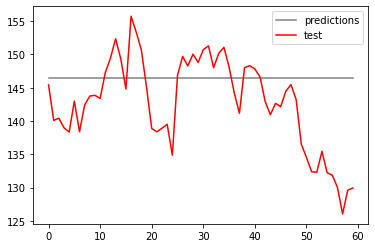

In [57]:
plt.plot(predictions,color='grey',label='predictions')
#plt.plot(aapl['Close'].values,color='red')
plt.plot(test,color='red',label='test')
plt.legend(loc='upper right')

In [58]:
#21. Fit an ARMA model to the return time series

In [59]:
X = linear_rets.values
train2, test2 = X[0:len(X)-60], X[len(X)-60:]
print(len(train2))

239


In [60]:
print(statsmodels.tsa.stattools.adfuller(train2))

(-15.328767517769844, 3.972059672836943e-28, 0, 238, {'1%': -3.458128284586202, '5%': -2.873761835239286, '10%': -2.5732834559706235}, -1083.8652746599384)


In [61]:
arima_model2 = arimamodel(train2)
arima_model2.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1174.204, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1172.205, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1172.205, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1176.192, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1170.243, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.230 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  239
Model:                        SARIMAX   Log Likelihood                 589.096
Date:                Fri, 17 Feb 2023   AIC                          -1176.192
Time:                        16:58:48   BIC                          -1172.716
Sample:                             0   HQIC                         -1174.791
                                - 239                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0004   3.64e-05     11.619      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.48
Prob(Q):                              0.97   Prob(JB):                         0.48
Heteroskedasticity (H):               1.30   Skew:                            -0.14
Prob(H) (two-sided):                  0.24   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
model2 = ARIMA(train2, order=(0,0,0))
model_fit2 = model2.fit()

In [63]:
#22. Display the parameters of the model and its Mean Squared Error (MSE) in the training set and in the test set

In [65]:
print('Coefficients: %s' % model_fit2.params)
# make predictions
predictions2 = model_fit2.forecast(steps=len(test2))
error2 = mean_squared_error(test2,predictions2)
print('Test MSE: %.5f' % error2)

predictions_train2 = model_fit2.predict(start=0, end=238)
error_train2 = mean_squared_error(train2,predictions_train2)
print('Train MSE: %.5f' % error_train2)

Coefficients: [0.00014218 0.00042303]
Test MSE: 0.00064
Train MSE: 0.00042


In [66]:
predictions2

array([0.00014218, 0.00014218, 0.00014218, 0.00014218, 0.00014218,
       0.00014218, 0.00014218, 0.00014218, 0.00014218, 0.00014218,
       0.00014218, 0.00014218, 0.00014218, 0.00014218, 0.00014218,
       0.00014218, 0.00014218, 0.00014218, 0.00014218, 0.00014218,
       0.00014218, 0.00014218, 0.00014218, 0.00014218, 0.00014218,
       0.00014218, 0.00014218, 0.00014218, 0.00014218, 0.00014218,
       0.00014218, 0.00014218, 0.00014218, 0.00014218, 0.00014218,
       0.00014218, 0.00014218, 0.00014218, 0.00014218, 0.00014218,
       0.00014218, 0.00014218, 0.00014218, 0.00014218, 0.00014218,
       0.00014218, 0.00014218, 0.00014218, 0.00014218, 0.00014218,
       0.00014218, 0.00014218, 0.00014218, 0.00014218, 0.00014218,
       0.00014218, 0.00014218, 0.00014218, 0.00014218, 0.00014218])

In [67]:
#23. Plot the return time series vs the ARMA forecast in the test set

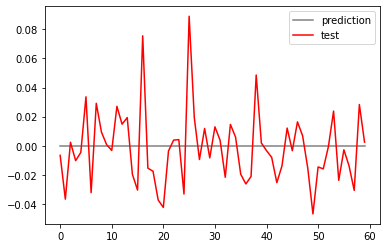

In [68]:
plt.plot(predictions2,color='grey',label='prediction')
plt.plot(test2,color='red',label='test')
plt.legend()

In [69]:
#24. Introduce mathematically a Gaussianity test

The Gaussianity test was used to check if the data follows normal distribution. It uses covariance of paris of different orders. Null hypothesis: data follows normal distribution. The statistics that evaluated in Gaussianity test is: 

$W = \frac{(\sum_{i}^{T} a_i *r_{(i)})^2} {\sum_{i}^{T} (r_{(i)} -\mu)^2}$

where $r_{(i)}$ is the i-th smallest value in the sample such that:
$a_i=\frac{m^T V^{-1}}{N}$

N is a normalization factor such that $\sum_{i} (a_i)^2 =1 $

m=vector of expected values of all order statistics in a Gaussian distribution

V=expected covariance of pairs of order statistics

After sorting the data, we calculate the statistics W and its p-value.


In [70]:
#25. Perform a Gaussianity test of the return time series

In [71]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)

# generate univariate observations
# normality test
stat, p = shapiro(r_aapl)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05

if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.987, p=0.009
Sample does not look Gaussian (reject H0)


In [72]:
#26. Introduce mathematically a stationarity test

If the time series data is stationary, it means the data don't depend on time. It has two types of stationarity:

i) Strong stationarity:$(y_1,y_2,..y_n)=(y_{1+\tau},y_{2+\tau},...y_{n+\tau})$ in distribution.

ii) Weak stationarity: 

$E(y_t)=\mu$; 

$Var(y_t)=E[(y_t -\mu)^2]=\sigma^2$;

$Cov[y_t,y_{t-\tau}]=E[(y_t-\mu)(y_{t-\tau}-\mu)]=C(\tau)$

For strong stationary, it means any joint distribution of any moments never depends on time, it is a very strict condition. However, for weak stationary, it only has constant mean, constant variance and constant covariance, and other condition could change over time, which means it is less strict.

In [73]:
#27. Perform a stationarity test of the return time series

In [74]:
print(statsmodels.tsa.stattools.adfuller(r_aapl))

(-13.339634511264338, 5.955772435682521e-25, 1, 297, {'1%': -3.4525611751768914, '5%': -2.87132117782556, '10%': -2.5719816428028888}, -1345.6376372426216)


In [ ]:
#since the p-value is much smaller than 5%, then we can reject it and thus the data is stationary.